In [1]:
import sys
import os
sys.path.append('../dags')

from database import create_database_engine


# 환경 변수 설정
os.environ["POSTGRES_USER"] = "airflow"
os.environ["POSTGRES_PASSWORD"] = "airflow"
os.environ["POSTGRES_DB"] = "events"
os.environ["POSTGRES_PORT"] = "5433"

engine = create_database_engine(host="127.0.0.1")
print("Successfully connected to the database")

Successfully connected to the database


In [2]:
import pandas as pd
from datetime import datetime
table = "kind"
# 날짜 범위 설정
start_date = datetime(2022, 7, 1)
end_date = datetime(2023, 12, 31)

query = f"""SELECT * FROM {table}
WHERE stock_code != ''
  AND market IN ('KOSPI', 'KOSDAQ', 'KOSDAQ GLOBAL')
  AND disclosed_at >= %(start_date)s
  AND disclosed_at <= %(end_date)s
  AND label is not NULL
ORDER BY disclosed_at ASC"""

df = pd.read_sql(query, engine, params={"start_date": start_date, "end_date": end_date})
print(f"데이터베이스에서 조회된 공시 이벤트 수: {len(df)}")
df.head()


DETAIL:  The database was created using collation version 2.36, but the operating system provides version 2.41.
HINT:  Rebuild all objects in this database that use the default collation and run ALTER DATABASE events REFRESH COLLATION VERSION, or build PostgreSQL with the right library version.


데이터베이스에서 조회된 공시 이벤트 수: 9808


,id,disclosure_id,disclosed_at,company_name,stock_code,short_code,market,title,summary_kr,raw,detail_url,created_at,updated_at,is_modify,disclosure_type,dart_unique_id,masked,label
0,325697,20220701000005,2022-07-01 07:49:00,CG인바이츠,KR7083790006,083790,KOSDAQ,투자판단 관련 주요경영사항(임상 2상 시험계획 조기 종료 신청),이 임상2상 시험은 코로나19 환자에서 카모스타트의 유효성과 안전성을 평가하기 위해...,1. 제목: 코로나19 바이러스(SARS-CoV-2) 감염이 확진된 COVID-19...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,임상 계획 신청,,이 임상2상 시험은 코로나19 환자에서 회사 A의 유효성과 안전성을 평가하기 위해 ...,-1
1,325691,20220701000107,2022-07-01 10:03:00,강원에너지,KR7114190002,114190,KOSDAQ,타법인주식및출자증권취득결정(자율공시),"강원이솔루션은 2022년 7월 1일 이차전지 사업의 핵심기술 확보를 위해 20,00...",1. 발행회사\n회사명(국적): 주식회사\n강원이솔루션\n(대한민국)\n대표이사: ...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,타법인 주식 및 출자증권 양수결정,,"회사 A는 2022년 7월 1일 이차전지 사업의 핵심기술 확보를 위해 20,000주...",1
2,325686,20220701000122,2022-07-01 10:24:00,비츠로셀,KR7082920000,082920,KOSDAQ,단일판매ㆍ공급계약체결,"회사는 방위사업청과 15,107,298,910원 규모의 리튬전지류 및 기뢰정비장비용...",1. 판매ㆍ공급계약 내용: 방위사업청 공급계약 (리튬전지류 및 기뢰정비장비용 전지조...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,단일판매ㆍ공급계약체결,,"회사 A는 방위사업청과 15,107,298,910원 규모의 리튬전지류 및 기뢰정비장...",1
3,325685,20220701000123,2022-07-01 10:26:00,비츠로테크,KR7042370007,042370,KOSDAQ,단일판매ㆍ공급계약체결(자회사의 주요경영사항),해당 기업은 방위사업청과 2022년 6월에 공급계약을 체결하여 전지조립체를 공급했으...,1. 판매ㆍ공급계약 내용: 방위사업청 공급계약 (리튬전지류 및 기뢰정비장비용 전지조...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,단일판매ㆍ공급계약체결,,해당 기업은 방위사업청과 2022년 6월에 공급계약을 체결하여 전지조립체를 공급했으...,0
4,325676,20220701000136,2022-07-01 10:43:00,동원시스템즈,KR7014820005,014820,KOSPI,신규시설투자등(자율공시),이 기업은 충청남도 아산시에 위치한 2차전지 캔 신공장 건설을 위해 약 585억 원...,1. 투자구분: 신규시설투자\n- 투자대상: 2차전지 캔 신공장 신축공사\n2. 투...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,신규시설투자,,이 기업은 충청남도 아산시에 위치한 2차전지 캔 신공장 건설을 위해 약 585억 원...,0


시장별 공시 분포:
market
KOSDAQ    5753
KOSPI     4055
Name: count, dtype: int64

총 공시 건수: 9808

시장별 비율:
KOSDAQ: 5753건 (58.7%)
KOSPI: 4055건 (41.3%)


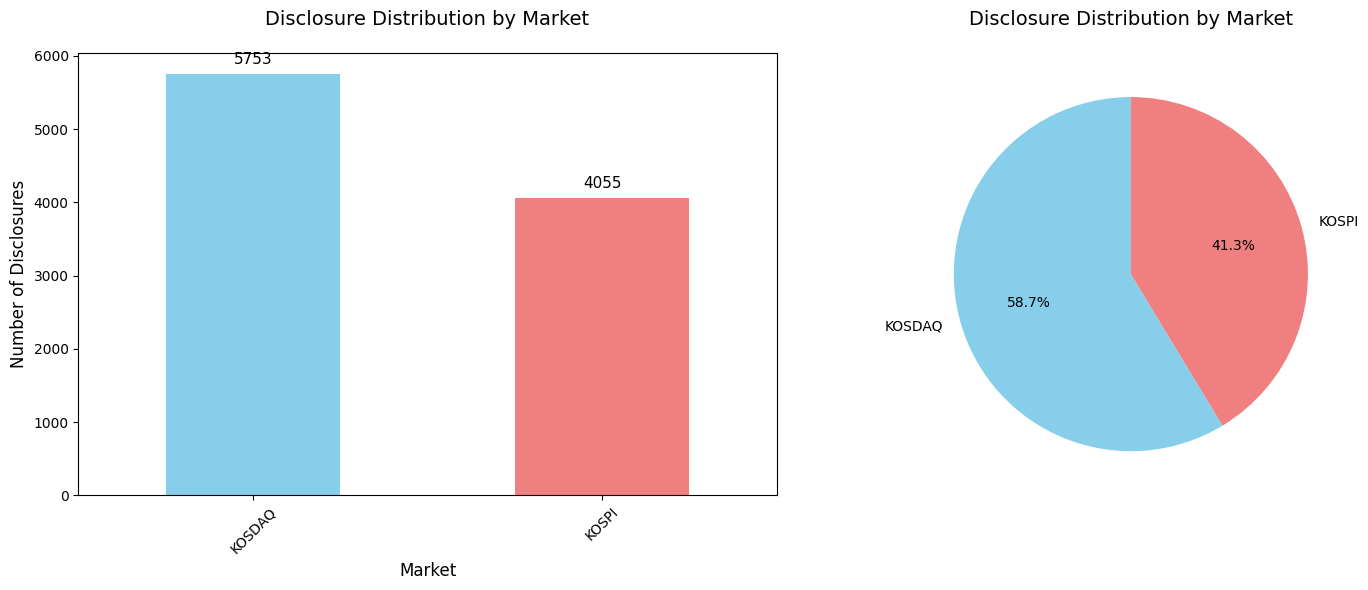

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# market 종류와 각각의 비율 분석
market_counts = df['market'].value_counts()
print("시장별 공시 분포:")
print(market_counts)
print(f"\n총 공시 건수: {len(df)}")
print("\n시장별 비율:")
for market, count in market_counts.items():
    ratio = count / len(df) * 100
    print(f"{market}: {count}건 ({ratio:.1f}%)")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
market_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Disclosure Distribution by Market', fontsize=14, pad=20)
ax1.set_xlabel('Market', fontsize=12)
ax1.set_ylabel('Number of Disclosures', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(market_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=11)

# 파이 차트
market_ratios = market_counts / len(df) * 100
ax2.pie(market_ratios.values, labels=market_ratios.index, autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Disclosure Distribution by Market', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


공시 발표 시간대별 분포 (KST 기준):
market_session
After Hours      5944
Trading Hours    3864
Name: count, dtype: int64

장중 비율: 39.4%
장외 비율: 60.6%


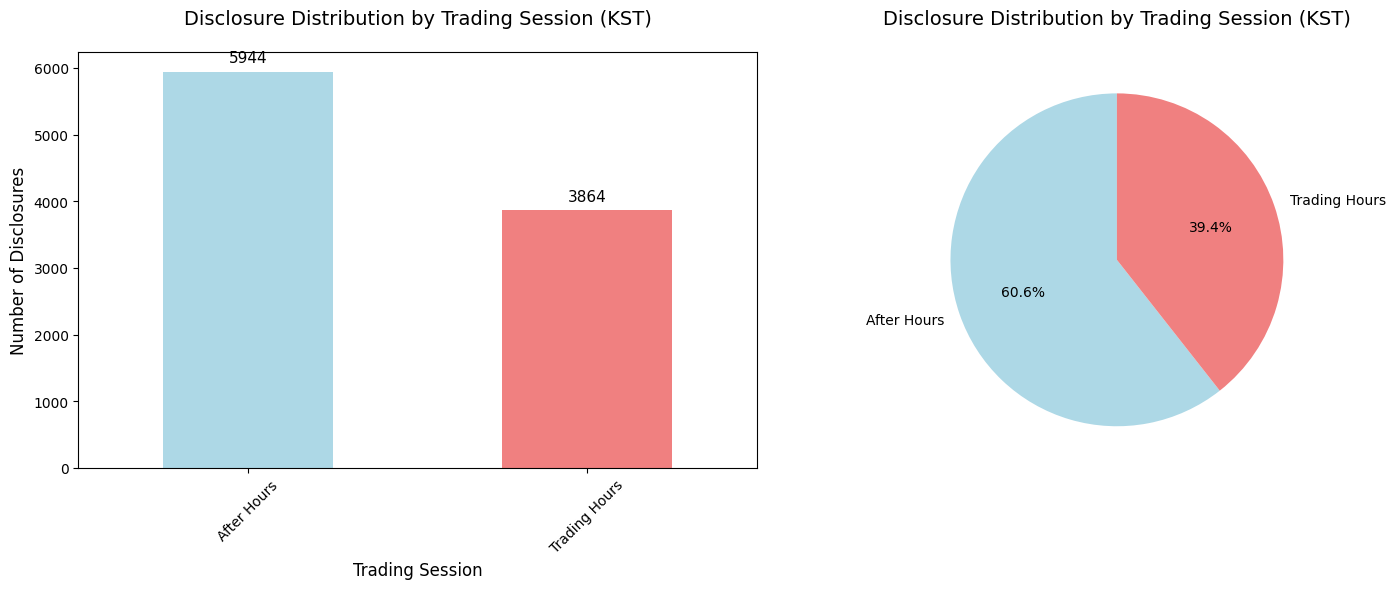

<Figure size 640x480 with 0 Axes>

In [4]:
# disclosed_at을 datetime으로 변환 (이미 KST 기준으로 저장됨)
df['disclosed_at'] = pd.to_datetime(df['disclosed_at'])

# 이미 KST 기준이므로 그대로 사용
df['disclosed_at_kst'] = df['disclosed_at']
df = df.sort_values('disclosed_at_kst')
df['time_only'] = df['disclosed_at_kst'].dt.time

# 장중 시간 정의 (9:00 ~ 15:20) - KST 기준
import datetime
market_open = datetime.time(9, 0)
market_close = datetime.time(15, 20)

# 장중/장외 분류
df['market_session'] = df['time_only'].apply(
    lambda x: 'Trading Hours' if market_open <= x <= market_close else 'After Hours'
)

# 결과 집계
session_counts = df['market_session'].value_counts()
print("공시 발표 시간대별 분포 (KST 기준):")
print(session_counts)
print(f"\n장중 비율: {session_counts.get('Trading Hours', 0) / len(df) * 100:.1f}%")
print(f"장외 비율: {session_counts.get('After Hours', 0) / len(df) * 100:.1f}%")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
session_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Disclosure Distribution by Trading Session (KST)', fontsize=14, pad=20)
ax1.set_xlabel('Trading Session', fontsize=12)
ax1.set_ylabel('Number of Disclosures', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(session_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=11)

# 파이 차트
session_ratios = session_counts / len(df) * 100
ax2.pie(session_ratios.values, labels=session_ratios.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Disclosure Distribution by Trading Session (KST)', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from datetime import datetime

# 1분 단위 abn_ret 컬럼을 -9분~+9분까지 모두 추가
minute_offsets = list(range(-9, 0)) + list(range(1, 10))
minute_columns = [f"ar.abn_ret_{'minus_' if m < 0 else ''}{abs(m)}m" for m in minute_offsets]

# 기존 10, 20, ... 60m 컬럼
more_minute_columns = [
    "ar.abn_ret_minus_60m",
    "ar.abn_ret_minus_50m",
    "ar.abn_ret_minus_40m",
    "ar.abn_ret_minus_30m",
    "ar.abn_ret_minus_20m",
    "ar.abn_ret_minus_10m",
    "ar.abn_ret_10m",
    "ar.abn_ret_20m",
    "ar.abn_ret_30m",
    "ar.abn_ret_40m",
    "ar.abn_ret_50m",
    "ar.abn_ret_60m"
]

all_abn_ret_cols = ',\n    '.join(minute_columns + more_minute_columns)

query = f"""
SELECT ar.event_id,
    ar.event_ts,
    {all_abn_ret_cols},
    k.company_name,
    k.disclosure_type,
    k.masked,
    k.label
FROM abnormal_return_kind ar
JOIN "kind" k ON ar.event_id = k.id
WHERE k.disclosed_at >= '{start_date.strftime('%Y-%m-%d')}'
  AND k.disclosed_at <= '{end_date.strftime('%Y-%m-%d')}'
ORDER BY k.disclosed_at ASC
"""

target_df = pd.read_sql(query, engine)
target_df

,event_id,event_ts,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,...,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,company_name,disclosure_type,masked,label
0,325691,2022-07-01 10:03:00+00:00,-0.66,0.14,0.19,-0.19,-0.19,0.28,-0.14,-0.14,...,-1.27,-2.41,-2.36,-1.79,-2.98,-1.98,강원에너지,타법인 주식 및 출자증권 양수결정,"회사 A는 2022년 7월 1일 이차전지 사업의 핵심기술 확보를 위해 20,000주...",1
1,325686,2022-07-01 10:24:00+00:00,-1.43,-1.43,-1.43,-1.28,-1.23,-1.19,-1.66,-1.66,...,0.53,2.43,1.19,1.57,1.38,1.72,비츠로셀,단일판매ㆍ공급계약체결,"회사 A는 방위사업청과 15,107,298,910원 규모의 리튬전지류 및 기뢰정비장...",1
2,325685,2022-07-01 10:26:00+00:00,-0.05,0.10,0.00,0.05,-0.14,-0.14,-0.14,-0.05,...,0.14,0.19,1.01,1.58,1.87,1.68,비츠로테크,단일판매ㆍ공급계약체결,해당 기업은 방위사업청과 2022년 6월에 공급계약을 체결하여 전지조립체를 공급했으...,0
3,325676,2022-07-01 10:43:00+00:00,-0.99,-1.11,-1.13,-1.03,-1.13,-1.18,-1.26,-1.34,...,0.08,0.36,0.31,0.12,-0.18,0.23,동원시스템즈,신규시설투자,이 기업은 충청남도 아산시에 위치한 2차전지 캔 신공장 건설을 위해 약 585억 원...,0
4,325672,2022-07-01 11:03:00+00:00,-0.30,-0.35,-0.28,-0.04,-0.04,-0.14,0.04,-0.06,...,-0.23,0.13,0.09,-0.02,-0.26,-0.13,HD현대미포,단일판매ㆍ공급계약체결,"이 회사 A는 오세아니아의 선주와 LPG선 1척 공급 계약을 체결했으며, 계약금액은...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,375890,2023-12-28 14:46:00+00:00,-1.94,-1.85,-1.85,-1.85,-1.82,-1.82,-1.94,-1.98,...,7.36,4.96,5.17,NaN,NaN,NaN,윤성에프앤씨,단일판매ㆍ공급계약체결,이 회사는 2차전지 믹싱시스템 공급을 위한 계약을 2023년 12월 27일에 체결하...,1
3580,375886,2023-12-28 14:53:00+00:00,0.64,0.68,0.62,-0.01,0.02,0.00,0.00,-0.01,...,0.24,0.24,NaN,NaN,NaN,NaN,까뮤이앤씨,단일판매ㆍ공급계약체결,이 회사는 전라남도 목포시에서 진행 중인 수산식품 수출단지 조성 건축공사 수주 계약...,1
3581,375978,2023-12-28 14:56:00+00:00,0.41,0.59,0.58,0.58,0.56,0.52,0.45,0.45,...,0.42,-0.14,NaN,NaN,NaN,NaN,한창,주권 관련 사채권 양수 결정,"회사 A는 2023년 12월 28일 13회차 전환사채를 취득했으며, 이는 종속회사인...",0
3582,375977,2023-12-28 14:56:00+00:00,0.41,0.59,0.58,0.58,0.56,0.52,0.45,0.45,...,0.42,-0.14,NaN,NaN,NaN,NaN,한창,주권 관련 사채권 양수 결정,회사 A는 2023년 12월 28일에 16회차 무기명식 이권부 무보증 사모 전환사채...,0


In [6]:
print("\n=== 기본 데이터 분석 ===")

# 컬럼 정보
print(f"컬럼 수: {len(target_df.columns)}")
print(f"컬럼명: {list(target_df.columns)}")

# 데이터 타입
print("\n데이터 타입:")
print(target_df.dtypes)

# 결측값 확인
print("\n결측값 현황:")
print(target_df.isnull().sum())


=== 기본 데이터 분석 ===
컬럼 수: 36
컬럼명: ['event_id', 'event_ts', 'abn_ret_minus_9m', 'abn_ret_minus_8m', 'abn_ret_minus_7m', 'abn_ret_minus_6m', 'abn_ret_minus_5m', 'abn_ret_minus_4m', 'abn_ret_minus_3m', 'abn_ret_minus_2m', 'abn_ret_minus_1m', 'abn_ret_1m', 'abn_ret_2m', 'abn_ret_3m', 'abn_ret_4m', 'abn_ret_5m', 'abn_ret_6m', 'abn_ret_7m', 'abn_ret_8m', 'abn_ret_9m', 'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m', 'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m', 'company_name', 'disclosure_type', 'masked', 'label']

데이터 타입:
event_id                           int64
event_ts             datetime64[ns, UTC]
abn_ret_minus_9m                 float64
abn_ret_minus_8m                 float64
abn_ret_minus_7m                 float64
abn_ret_minus_6m                 float64
abn_ret_minus_5m                 float64
abn_ret_minus_4m                 float64
abn_ret_minus_3m             

In [7]:
ret_columns = [
    "abn_ret_minus_60m", "abn_ret_minus_50m", "abn_ret_minus_40m",
    "abn_ret_minus_30m", "abn_ret_minus_20m", "abn_ret_minus_10m",
    "abn_ret_10m", "abn_ret_20m", "abn_ret_30m",
    "abn_ret_40m", "abn_ret_50m", "abn_ret_60m"
]

In [8]:
target_df['disclosure_type'].value_counts()

disclosure_type
단일판매ㆍ공급계약체결           1465
매출액변동                  609
자기주식취득 신탁계약 체결 결정      216
타법인 주식 및 출자증권 양수결정     199
자기주식 취득 결정             130
특허권취득                  116
자기주식 처분 결정              98
신규시설투자                  87
자기주식 소각 결정              72
자기주식취득 신탁계약 해지 결정       66
무상증자 결정                 61
임상 계획 신청                58
유상증자 결정                 54
임상 계획 승인                48
전환사채권 발행결정              45
회사합병 결정                 43
타법인 주식 및 출자증권 양도결정      39
유형자산 양수 결정              38
유형자산 양도 결정              27
생산중단                    23
임상 계획 결과 발표             11
품목허가 신청                 10
단일판매ㆍ공급계약해지             10
회사분할 결정                  8
주권 관련 사채권 양수 결정          8
상각형 조건부자본증권 발행결정         7
교환사채권 발행결정               6
감자 결정                    5
소송 등의 제기                 4
품목허가 승인                  4
기술이전계약체결                 4
임상 계획 철회                 4
품목허가 철회                  3
주권 관련 사채권 양도 결정          2
횡령ㆍ배임혐의발생                2
자산양수도(기타), 풋백옵션          1
영업정지        

In [9]:
# config.py의 keywords 딕셔너리를 사용해서 한글-영어 카테고리 매핑 생성
category_mapping = {
    # 임상 관련
    "임상 계획 철회": "Clinical Trial Withdrawal",
    "임상 계획 신청": "Clinical Trial Application", 
    "임상 계획 승인": "Clinical Trial Approval",
    "임상 계획 결과 발표": "Clinical Trial Results",
    
    # 자산 관련
    "자산양수도(기타), 풋백옵션": "Asset Transfer & Putback Option",
    
    # 경영 관련
    "부도발생": "Default Occurrence",
    "영업정지": "Business Suspension", 
    "회생절차 개시신청": "Rehabilitation Procedure Initiation",
    "해산사유 발생": "Dissolution Cause Occurrence",
    
    # 자본 변동
    "유상증자 결정": "Paid-in Capital Increase Decision",
    "무상증자 결정": "Free Capital Increase Decision", 
    "유무상증자 결정": "Paid/Free Capital Increase Decision",
    "감자 결정": "Capital Reduction Decision",
    "주식분할 결정": "Stock Split Decision",
    
    # 금융 관련
    "채권은행 등의 관리절차 개시": "Creditor Bank Management Procedure Initiation",
    "채권은행 등의 관리절차 중단": "Creditor Bank Management Procedure Suspension",
    
    # 소송/분쟁
    "소송 등의 제기": "Litigation Filing",
    "소송등의판결ㆍ결정": "Litigation Judgment/Decision",
    
    # 해외 상장
    "해외 증권시장 주권등 상장 결정": "Overseas Securities Market Listing Decision",
    "해외 증권시장 주권등 상장폐지 결정": "Overseas Securities Market Delisting Decision", 
    "해외 증권시장 주권등 상장": "Overseas Securities Market Listing",
    "해외 증권시장 주권등 상장폐지": "Overseas Securities Market Delisting",
    
    # 채권 발행
    "전환사채권 발행결정": "Convertible Bond Issuance Decision",
    "신주인수권부사채권 발행결정": "Bond with Warrant Issuance Decision",
    "교환사채권 발행결정": "Exchangeable Bond Issuance Decision",
    "상각형 조건부자본증권 발행결정": "Contingent Convertible Security Issuance Decision",
    
    # 자사주 관련
    "자기주식 취득 결정": "Treasury Stock Acquisition Decision",
    "자기주식 처분 결정": "Treasury Stock Disposal Decision", 
    "자기주식 소각 결정": "Treasury Stock Retirement Decision",
    "자기주식취득 신탁계약 체결 결정": "Treasury Stock Acquisition Trust Contract Decision",
    "자기주식취득 신탁계약 해지 결정": "Treasury Stock Acquisition Trust Contract Termination Decision",
    
    # 영업 양수도
    "영업양수 결정": "Business Acquisition Decision",
    "영업양도 결정": "Business Transfer Decision",
    
    # 자산 취득/처분
    "유형자산 양수 결정": "Tangible Asset Acquisition Decision",
    "유형자산 양도 결정": "Tangible Asset Transfer Decision",
    "타법인 주식 및 출자증권 양수결정": "Other Corporation Stock Acquisition Decision",
    "타법인 주식 및 출자증권 양도결정": "Other Corporation Stock Transfer Decision",
    "주권 관련 사채권 양수 결정": "Stock-related Bond Acquisition Decision",
    "주권 관련 사채권 양도 결정": "Stock-related Bond Transfer Decision",
    
    # 기업 구조 변경
    "회사합병 결정": "Company Merger Decision",
    "회사분할 결정": "Company Spin-off Decision", 
    "회사분할합병 결정": "Company Split-Merger Decision",
    "주식교환ㆍ이전 결정": "Stock Exchange/Transfer Decision",
    
    # 공시 관련
    "지분공시": "Equity Disclosure",
    "실적공시": "Earnings Disclosure",
    
    # 계약 관련
    "단일판매ㆍ공급계약해지": "Single Sales/Supply Contract Termination",
    "단일판매ㆍ공급계약체결": "Single Sales/Supply Contract Execution",
    
    # 기타
    "생산중단": "Production Suspension",
    "배당": "Dividend",
    "매출액변동": "Revenue Change",
    "특허권취득": "Patent Acquisition",
    "신규시설투자": "New Facility Investment",
    "기술이전계약해지": "Technology Transfer Contract Termination",
    "기술이전계약체결": "Technology Transfer Contract Execution",
    
    # 품목허가 관련
    "품목허가 철회": "Product Approval Withdrawal",
    "품목허가 신청": "Product Approval Application",
    "품목허가 승인": "Product Approval",
    
    # 기타
    "횡령ㆍ배임혐의발생": "Embezzlement/Malfeasance Allegation",
    "공개매수": "Public Tender Offer"
}

import pandas as pd
pd.DataFrame(list(category_mapping.items()), columns=["category_kr", "category_en"])

,category_kr,category_en
0,임상 계획 철회,Clinical Trial Withdrawal
1,임상 계획 신청,Clinical Trial Application
2,임상 계획 승인,Clinical Trial Approval
3,임상 계획 결과 발표,Clinical Trial Results
4,"자산양수도(기타), 풋백옵션",Asset Transfer & Putback Option
5,부도발생,Default Occurrence
6,영업정지,Business Suspension
7,회생절차 개시신청,Rehabilitation Procedure Initiation
8,해산사유 발생,Dissolution Cause Occurrence
9,유상증자 결정,Paid-in Capital Increase Decision


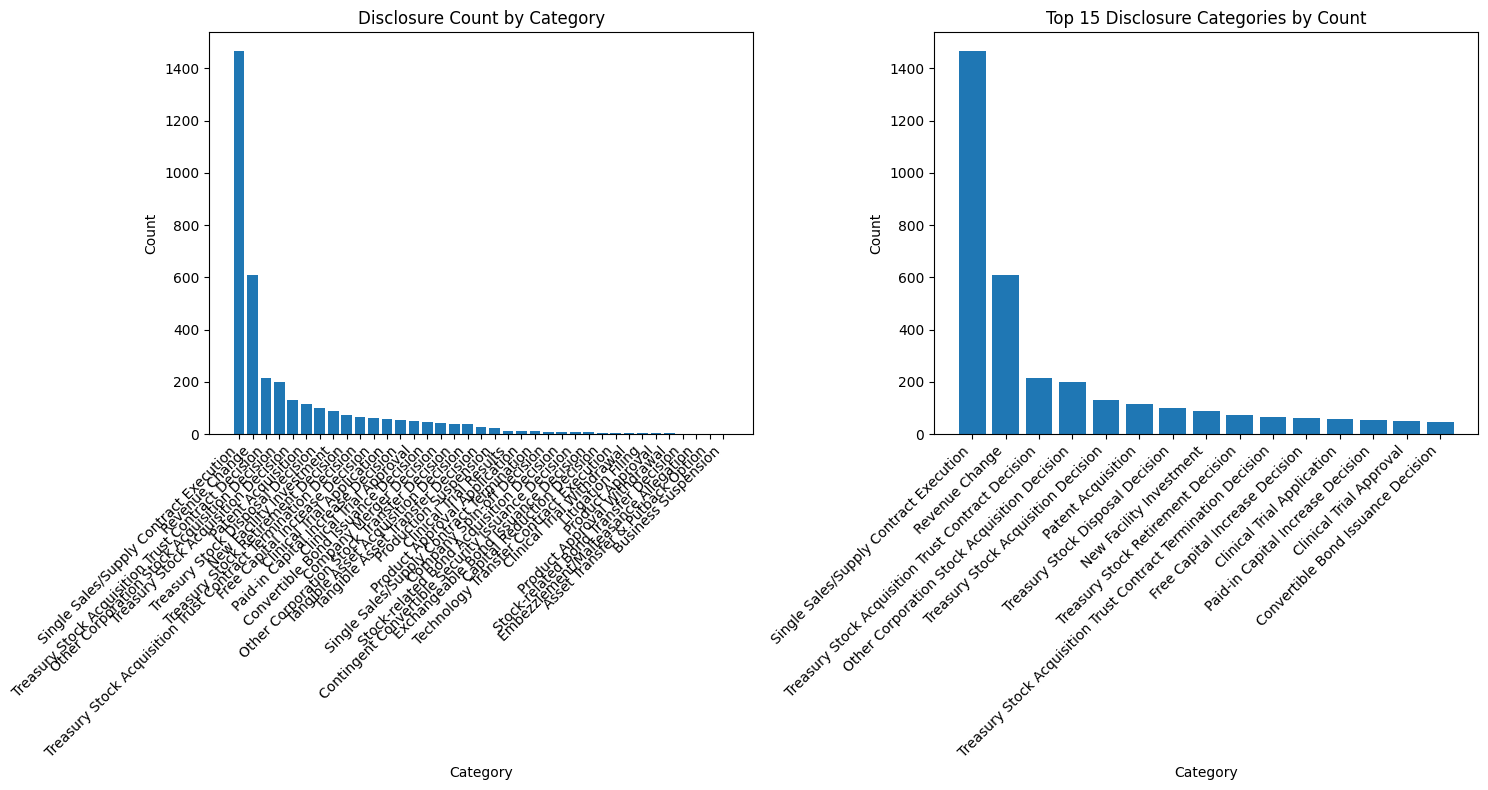

총 37개 카테고리, 총 3584건의 공시

상위 15개 카테고리:
disclosure_type
단일판매ㆍ공급계약체결           1465
매출액변동                  609
자기주식취득 신탁계약 체결 결정      216
타법인 주식 및 출자증권 양수결정     199
자기주식 취득 결정             130
특허권취득                  116
자기주식 처분 결정              98
신규시설투자                  87
자기주식 소각 결정              72
자기주식취득 신탁계약 해지 결정       66
무상증자 결정                 61
임상 계획 신청                58
유상증자 결정                 54
임상 계획 승인                48
전환사채권 발행결정              45
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from config import keywords



df_with_returns = target_df.copy()
category_counts = df_with_returns['disclosure_type'].value_counts()

# 카테고리별 건수 시각화
plt.figure(figsize=(15, 8))
category_counts_sorted = category_counts.sort_values(ascending=False)

# 한글 카테고리를 영어로 매핑
category_counts_sorted_en = category_counts_sorted.copy()
category_counts_sorted_en.index = [category_mapping.get(cat, cat) for cat in category_counts_sorted_en.index]

plt.subplot(1, 2, 1)
plt.bar(range(len(category_counts_sorted_en)), category_counts_sorted_en.values)
plt.title('Disclosure Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(category_counts_sorted_en)), category_counts_sorted_en.index, rotation=45, ha='right')

# 상위 15 카테고리만 별도 표시
plt.subplot(1, 2, 2)
top_15 = category_counts_sorted_en.head(15)
plt.bar(range(len(top_15)), top_15.values)
plt.title('Top 15 Disclosure Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(top_15)), top_15.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print(f"총 {len(category_counts)}개 카테고리, 총 {category_counts.sum()}건의 공시")
print("\n상위 15개 카테고리:")
print(category_counts_sorted.head(15))

In [11]:
df_with_returns.isnull().sum()
df_with_returns.describe()
df_with_returns.info()

df_with_returns.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   event_id           3584 non-null   int64              
 1   event_ts           3584 non-null   datetime64[ns, UTC]
 2   abn_ret_minus_9m   3546 non-null   float64            
 3   abn_ret_minus_8m   3550 non-null   float64            
 4   abn_ret_minus_7m   3555 non-null   float64            
 5   abn_ret_minus_6m   3556 non-null   float64            
 6   abn_ret_minus_5m   3562 non-null   float64            
 7   abn_ret_minus_4m   3566 non-null   float64            
 8   abn_ret_minus_3m   3575 non-null   float64            
 9   abn_ret_minus_2m   3577 non-null   float64            
 10  abn_ret_minus_1m   3580 non-null   float64            
 11  abn_ret_1m         3568 non-null   float64            
 12  abn_ret_2m         3551 non-null   float64      

,event_id,event_ts,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,...,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,company_name,disclosure_type,masked,label
0,325691,2022-07-01 10:03:00+00:00,-0.66,0.14,0.19,-0.19,-0.19,0.28,-0.14,-0.14,...,-1.27,-2.41,-2.36,-1.79,-2.98,-1.98,강원에너지,타법인 주식 및 출자증권 양수결정,"회사 A는 2022년 7월 1일 이차전지 사업의 핵심기술 확보를 위해 20,000주...",1
1,325686,2022-07-01 10:24:00+00:00,-1.43,-1.43,-1.43,-1.28,-1.23,-1.19,-1.66,-1.66,...,0.53,2.43,1.19,1.57,1.38,1.72,비츠로셀,단일판매ㆍ공급계약체결,"회사 A는 방위사업청과 15,107,298,910원 규모의 리튬전지류 및 기뢰정비장...",1
2,325685,2022-07-01 10:26:00+00:00,-0.05,0.10,0.00,0.05,-0.14,-0.14,-0.14,-0.05,...,0.14,0.19,1.01,1.58,1.87,1.68,비츠로테크,단일판매ㆍ공급계약체결,해당 기업은 방위사업청과 2022년 6월에 공급계약을 체결하여 전지조립체를 공급했으...,0
3,325676,2022-07-01 10:43:00+00:00,-0.99,-1.11,-1.13,-1.03,-1.13,-1.18,-1.26,-1.34,...,0.08,0.36,0.31,0.12,-0.18,0.23,동원시스템즈,신규시설투자,이 기업은 충청남도 아산시에 위치한 2차전지 캔 신공장 건설을 위해 약 585억 원...,0
4,325672,2022-07-01 11:03:00+00:00,-0.30,-0.35,-0.28,-0.04,-0.04,-0.14,0.04,-0.06,...,-0.23,0.13,0.09,-0.02,-0.26,-0.13,HD현대미포,단일판매ㆍ공급계약체결,"이 회사 A는 오세아니아의 선주와 LPG선 1척 공급 계약을 체결했으며, 계약금액은...",1


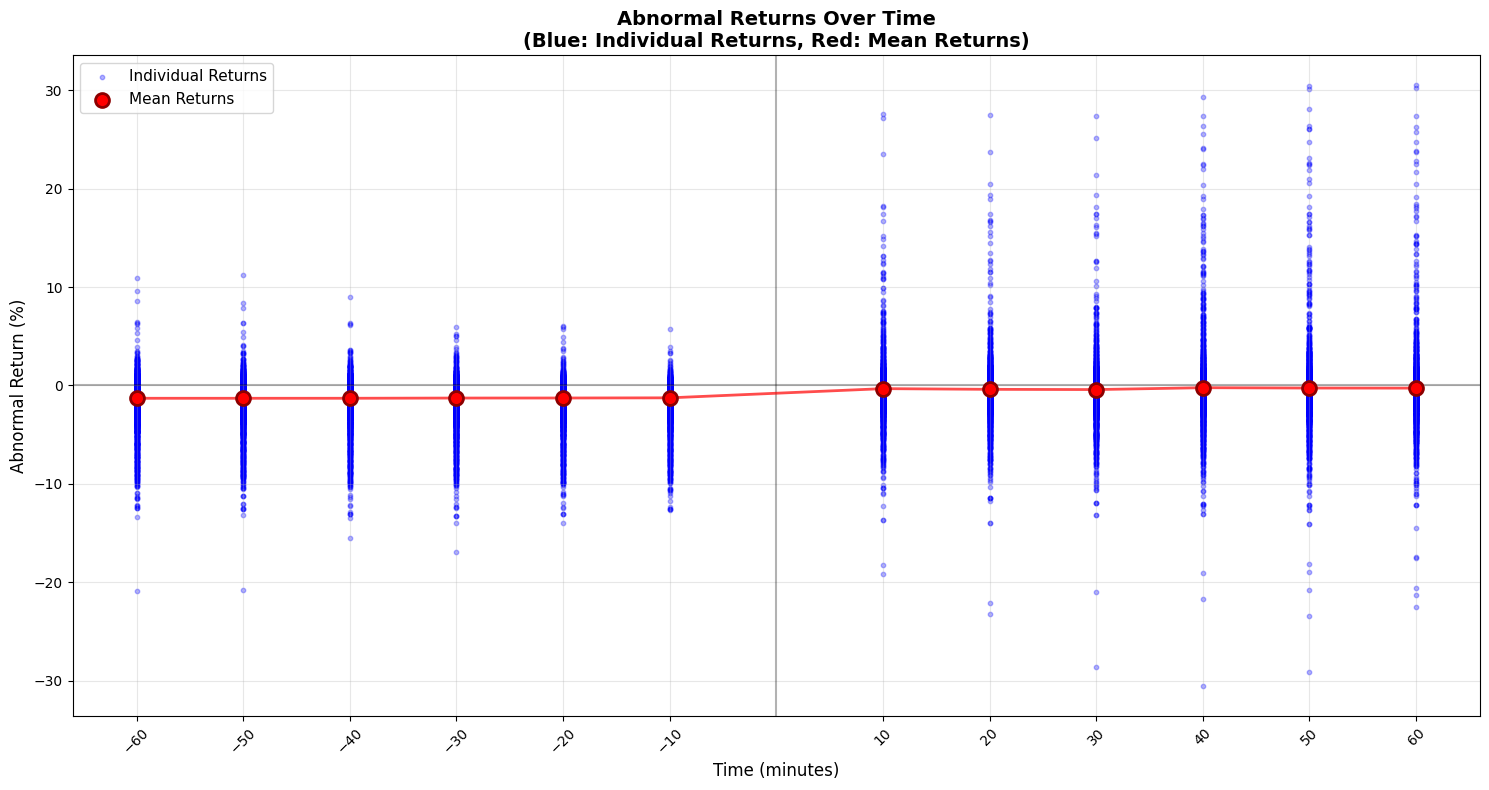

=== 시간별 수익률 통계 ===
전체 데이터 포인트 수: 38,383
시간 범위: -60분 ~ 60분
수익률 범위: -30.540% ~ 30.490%
전체 평균 수익률: -0.832%
전체 표준편차: 2.590%

=== 시간별 평균 수익률 ===
-60분: -1.302%
-50분: -1.303%
-40분: -1.301%
-30분: -1.278%
-20분: -1.274%
-10분: -1.257%
 10분: -0.323%
 20분: -0.393%
 30분: -0.418%
 40분: -0.227%
 50분: -0.262%
 60분: -0.269%

=== 이벤트 전후 비교 ===
이벤트 전 평균 수익률: -1.286%
이벤트 후 평균 수익률: -0.315%
이벤트 후 - 이벤트 전: 0.970%


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 시간축 설정 (분 단위)
time_points = [-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]

# 수익률 컬럼들 (시간순서대로 정렬)
ret_columns = [
    'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 
    'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m',
    0,  # 0분 시점은 없으므로 0으로 설정
    'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 
    'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m'
]

# 실제 수익률 데이터가 있는 컬럼들만 추출
valid_ret_columns = [col for col in ret_columns if col != 0]
valid_time_points = [t for t in time_points if t != 0]

# 각 시간점별 데이터 수집
all_returns = []
all_times = []

for i, col in enumerate(valid_ret_columns):
    if col in df_with_returns.columns:
        # NaN이 아닌 데이터만 추출
        valid_data = df_with_returns[col].dropna()
        if len(valid_data) > 0:
            # 해당 시간점에 대한 모든 수익률 데이터 추가
            for ret in valid_data:
                all_returns.append(ret)
                all_times.append(valid_time_points[i])

# 개별 점들을 파란색으로 표시
plt.figure(figsize=(15, 8))
plt.scatter(all_times, all_returns, alpha=0.3, color='blue', s=10, label='Individual Returns')

# 각 시간점별 평균 계산 및 빨간색 점으로 표시
mean_returns = []
mean_times = []

for i, col in enumerate(valid_ret_columns):
    if col in df_with_returns.columns:
        valid_data = df_with_returns[col].dropna()
        if len(valid_data) > 0:
            mean_ret = valid_data.mean()
            mean_returns.append(mean_ret)
            mean_times.append(valid_time_points[i])

# 평균값들을 빨간색 점으로 표시
plt.scatter(mean_times, mean_returns, color='red', s=100, marker='o', 
           label='Mean Returns', zorder=5, edgecolor='darkred', linewidth=2)

# 평균값들을 빨간색 선으로 연결
plt.plot(mean_times, mean_returns, color='red', linewidth=2, alpha=0.7, zorder=4)

# 그래프 설정
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # 0% 수평선
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)  # 0분 수직선

plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Abnormal Return (%)', fontsize=12)
plt.title('Abnormal Returns Over Time\n(Blue: Individual Returns, Red: Mean Returns)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# x축 라벨 설정
plt.xticks(valid_time_points, rotation=45)

# y축 범위 설정 (데이터에 따라 조정)
plt.ylim(min(all_returns) * 1.1, max(all_returns) * 1.1)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("=== 시간별 수익률 통계 ===")
print(f"전체 데이터 포인트 수: {len(all_returns):,}")
print(f"시간 범위: {min(valid_time_points)}분 ~ {max(valid_time_points)}분")
print(f"수익률 범위: {min(all_returns):.3f}% ~ {max(all_returns):.3f}%")
print(f"전체 평균 수익률: {np.mean(all_returns):.3f}%")
print(f"전체 표준편차: {np.std(all_returns):.3f}%")

print("\n=== 시간별 평균 수익률 ===")
for time, mean_ret in zip(mean_times, mean_returns):
    print(f"{time:3d}분: {mean_ret:6.3f}%")

# 이벤트 전후 비교
before_event = [mean_ret for time, mean_ret in zip(mean_times, mean_returns) if time < 0]
after_event = [mean_ret for time, mean_ret in zip(mean_times, mean_returns) if time > 0]

if before_event and after_event:
    print(f"\n=== 이벤트 전후 비교 ===")
    print(f"이벤트 전 평균 수익률: {np.mean(before_event):.3f}%")
    print(f"이벤트 후 평균 수익률: {np.mean(after_event):.3f}%")
    print(f"이벤트 후 - 이벤트 전: {np.mean(after_event) - np.mean(before_event):.3f}%")


In [13]:
import pandas as pd
import numpy as np

ret_columns = [
    'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 
    'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m',
    'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 
    'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m'
]

# 실제 존재하는 컬럼만 필터링
valid_ret_columns = [col for col in ret_columns if col in df_with_returns.columns]

# 통계 계산을 위한 리스트 초기화
stats_data = []

for col in valid_ret_columns:
    abn_ret_data = df_with_returns[col].dropna()
    
    if len(abn_ret_data) > 0:
        total_count = len(abn_ret_data)
        total_mean = abn_ret_data.mean()
        total_std = abn_ret_data.std()
        positive_count = (abn_ret_data > 0).sum()
        total_positive_ratio = (positive_count / total_count * 100) if total_count > 0 else 0
        
        stats_data.append({
            'Column': col,
            'Count': total_count,
            'Mean (%)': round(total_mean, 3),
            'Std (%)': round(total_std, 3),
            'Positive_Count': positive_count,
            'Positive_Ratio (%)': round(total_positive_ratio, 1)
        })

# DataFrame으로 변환
stats_df = pd.DataFrame(stats_data)

# 시간순으로 정렬 (마이너스 시간이 먼저 오도록)
time_order = {
    'abn_ret_minus_60m': -60, 'abn_ret_minus_50m': -50, 'abn_ret_minus_40m': -40,
    'abn_ret_minus_30m': -30, 'abn_ret_minus_20m': -20, 'abn_ret_minus_10m': -10,
    'abn_ret_10m': 10, 'abn_ret_20m': 20, 'abn_ret_30m': 30,
    'abn_ret_40m': 40, 'abn_ret_50m': 50, 'abn_ret_60m': 60
}

stats_df['Time_Order'] = stats_df['Column'].map(time_order)
stats_df = stats_df.sort_values('Time_Order').drop('Time_Order', axis=1)


# 요약 통계
print(f"\n=== 요약 통계 ===")
print(f"총 컬럼 수: {len(stats_df)}")
print(f"총 데이터 포인트: {stats_df['Count'].sum():,}")
print(f"평균 수익률 범위: {stats_df['Mean (%)'].min():.3f}% ~ {stats_df['Mean (%)'].max():.3f}%")
print(f"표준편차 범위: {stats_df['Std (%)'].min():.3f}% ~ {stats_df['Std (%)'].max():.3f}%")

# 이벤트 전후 비교
before_event = stats_df[stats_df['Column'].str.contains('minus')]
after_event = stats_df[~stats_df['Column'].str.contains('minus')]

if len(before_event) > 0 and len(after_event) > 0:
    print(f"\n=== 이벤트 전후 비교 ===")
    print(f"이벤트 전 평균 수익률: {before_event['Mean (%)'].mean():.3f}%")
    print(f"이벤트 후 평균 수익률: {after_event['Mean (%)'].mean():.3f}%")
    print(f"이벤트 후 - 이벤트 전: {after_event['Mean (%)'].mean() - before_event['Mean (%)'].mean():.3f}%")


print("")
print("=== 전체 Abnormal Return 통계 ===")
print(stats_df.to_string(index=False))


=== 요약 통계 ===
총 컬럼 수: 12
총 데이터 포인트: 38,383
평균 수익률 범위: -1.303% ~ -0.227%
표준편차 범위: 1.975% ~ 3.506%

=== 이벤트 전후 비교 ===
이벤트 전 평균 수익률: -1.286%
이벤트 후 평균 수익률: -0.315%
이벤트 후 - 이벤트 전: 0.970%

=== 전체 Abnormal Return 통계 ===
           Column  Count  Mean (%)  Std (%)  Positive_Count  Positive_Ratio (%)
abn_ret_minus_60m   3253    -1.302    2.276             813                25.0
abn_ret_minus_50m   3313    -1.303    2.216             774                23.4
abn_ret_minus_40m   3376    -1.301    2.159             774                22.9
abn_ret_minus_30m   3425    -1.278    2.115             778                22.7
abn_ret_minus_20m   3484    -1.274    2.050             743                21.3
abn_ret_minus_10m   3544    -1.257    1.975             708                20.0
      abn_ret_10m   3405    -0.323    2.340            1401                41.1
      abn_ret_20m   3261    -0.393    2.467            1330                40.8
      abn_ret_30m   3070    -0.418    2.576            1232       

In [14]:
df_with_returns['label'].value_counts()

label
 1    2251
 0    1041
-1     292
Name: count, dtype: int64

# AI Inference

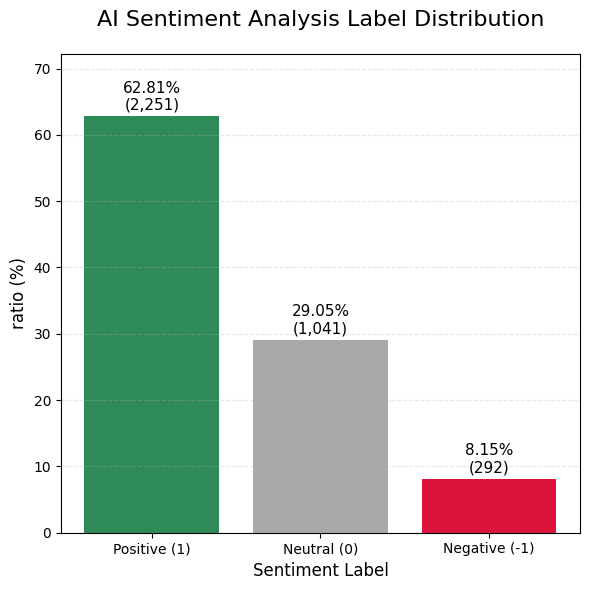

=== AI Sentiment Analysis Label Distribution ===
positive: 2,251건 (62.81%)
neutral: 1,041건 (29.05%)
negative: 292건 (8.15%)


In [15]:
# label 비율 시각화
plt.figure(figsize=(6, 6))

# label 비율 계산
label_counts = df_with_returns['label'].value_counts()
label_ratios = (label_counts / len(df_with_returns) * 100).round(2)

# 색상 매핑 (라벨 순서에 맞게)
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)

# x축 라벨 설정: 1=Positive(초록), 0=Neutral(회색), -1=Negative(빨강)
label_order = [1, 0, -1]
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

# 막대 그래프 생성
bars = plt.bar(range(len(label_order)), [label_ratios.get(l, 0) for l in label_order], color=colors)

# 막대 위에 비율 표시
for i, label in enumerate(label_order):
    if label in label_counts:
        ratio = label_ratios[label]
        count = label_counts[label]
        plt.text(i, ratio + 0.5, f'{ratio}%\n({count:,})',
                 ha='center', va='bottom', fontsize=11)

plt.title('AI Sentiment Analysis Label Distribution', fontsize=16, pad=20)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('ratio (%)', fontsize=12)
plt.ylim(0, max(label_ratios.values) * 1.15)

plt.xticks(range(len(label_order)), label_names)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("=== AI Sentiment Analysis Label Distribution ===")
for i, label in enumerate(label_order):
    if label in label_counts:
        count = label_counts[label]
        ratio = label_ratios[label]
        print(f"{label_names[i].split()[0].lower()}: {count:,}건 ({ratio}%)")


# Event Study

## 10 minute interval

In [16]:
ret_columns = [
    'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 
    'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m',
    'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 
    'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m'
]

print("Mean")
print(df_with_returns.groupby('label')[ret_columns].mean().to_string())

print()
print("Stdandard deviation")
print(df_with_returns.groupby('label')[ret_columns].std().to_string())

Mean
       abn_ret_minus_60m  abn_ret_minus_50m  abn_ret_minus_40m  abn_ret_minus_30m  abn_ret_minus_20m  abn_ret_minus_10m  abn_ret_10m  abn_ret_20m  abn_ret_30m  abn_ret_40m  abn_ret_50m  abn_ret_60m
label                                                                                                                                                                                                
-1             -0.369751          -0.335689          -0.340456          -0.324720          -0.295938          -0.270897    -0.218889    -0.276976    -0.295808    -0.448169    -0.597624    -0.554944
 0             -1.191785          -1.226509          -1.277539          -1.266176          -1.256630          -1.236667    -0.409493    -0.444342    -0.458737    -0.198159    -0.209413    -0.269172
 1             -1.481290          -1.469292          -1.440330          -1.411094          -1.410375          -1.395167    -0.295770    -0.383974    -0.413435    -0.214691    -0.246886    -0.239257

Stda

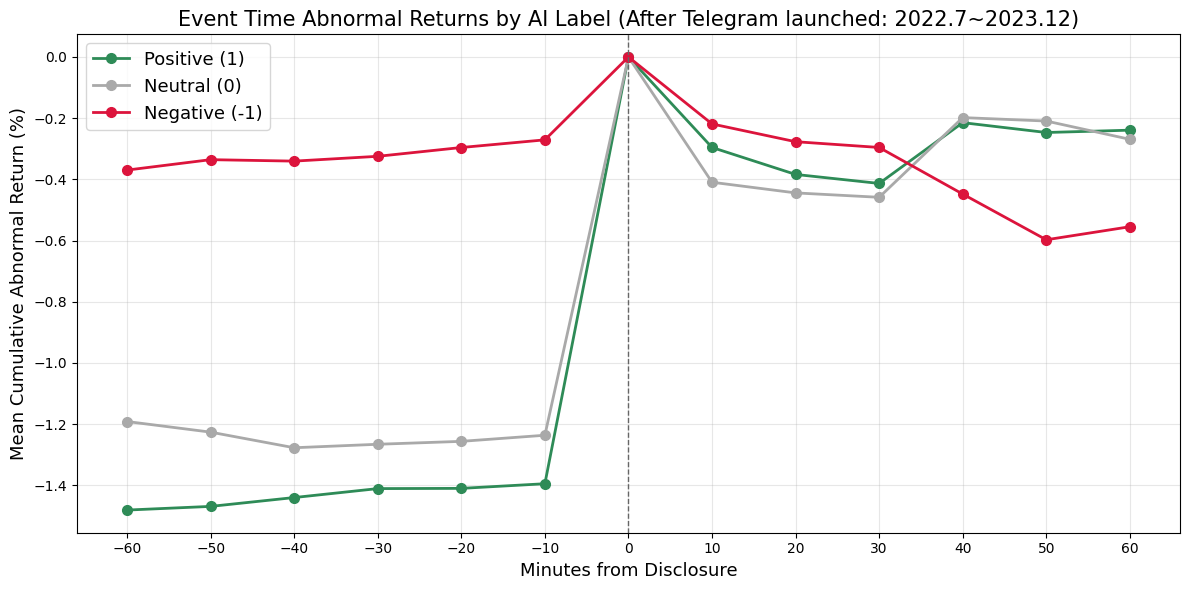

In [17]:
# X축 -60, -50, ..., 0, ..., 60, Y축 abnormal_ret_*m 평균값, 라벨별 색상/범례
# 각 데이터 포인트에 점도 표시 (marker 추가)
# t=0에서는 항상 (0, 0) 점을 찍어줌

# 시간순으로 정렬 (마이너스 시간이 먼저 오도록)
time_order = {
    'abn_ret_minus_60m': -60, 'abn_ret_minus_50m': -50, 'abn_ret_minus_40m': -40,
    'abn_ret_minus_30m': -30, 'abn_ret_minus_20m': -20, 'abn_ret_minus_10m': -10,
    # 0분은 실제 컬럼 없음 (중간에 직접 삽입)
    'abn_ret_10m': 10, 'abn_ret_20m': 20, 'abn_ret_30m': 30,
    'abn_ret_40m': 40, 'abn_ret_50m': 50, 'abn_ret_60m': 60
}

ordered_ret_cols = [col for col, _ in sorted(time_order.items(), key=lambda x: x[1]) if col in df_with_returns.columns]
plot_time_points = [time_order[col] for col in ordered_ret_cols]

# t=0 시점 추가 (컬럼에는 없으니 직접 넣는다)
insert_zero_idx = 0
for idx, t in enumerate(plot_time_points):
    if t > 0:
        insert_zero_idx = idx
        break
    else:
        insert_zero_idx = idx+1
plot_time_points_with_zero = plot_time_points[:insert_zero_idx] + [0] + plot_time_points[insert_zero_idx:]
ordered_ret_cols_with_zero = ordered_ret_cols[:insert_zero_idx] + ['__ZERO__'] + ordered_ret_cols[insert_zero_idx:]

fig, ax = plt.subplots(figsize=(12,6))

for label, color, name in zip(label_order, colors, label_names):  # <-- fixed! use normal zip
    grp = df_with_returns[df_with_returns['label'] == label]
    mean_vals = grp[ordered_ret_cols].mean()
    # 0분 컬럼값을 0으로(중간에 삽입)
    mean_vals_with_zero = list(mean_vals.values[:insert_zero_idx]) + [0.0] + list(mean_vals.values[insert_zero_idx:])
    # 선 그래프 + 데이터 포인트에 점(marker='o') 표시
    ax.plot(
        plot_time_points_with_zero,
        mean_vals_with_zero,
        label=name,
        color=color,
        linewidth=2,
        marker='o',
        markersize=7
    )
    # t=0인 점 강조(원해도 되고, 안 해도 됨)

ax.axvline(0, color="#666", linestyle="--", lw=1)
ax.legend(fontsize=13)
ax.set_xticks(plot_time_points_with_zero)
ax.set_xlabel("Minutes from Disclosure", fontsize=13)
ax.set_ylabel("Mean Cumulative Abnormal Return (%)", fontsize=13)
ax.set_title("Event Time Abnormal Returns by AI Label (After Telegram launched: 2022.7~2023.12)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


## 1 minute interval

In [18]:
# 1분 간격, -10분 ~ +10분
ret_columns = [
    'abn_ret_minus_10m', 'abn_ret_minus_9m', 'abn_ret_minus_8m', 'abn_ret_minus_7m', 'abn_ret_minus_6m',
    'abn_ret_minus_5m', 'abn_ret_minus_4m', 'abn_ret_minus_3m', 'abn_ret_minus_2m', 'abn_ret_minus_1m',
    'abn_ret_1m', 'abn_ret_2m', 'abn_ret_3m', 'abn_ret_4m',
    'abn_ret_5m', 'abn_ret_6m', 'abn_ret_7m', 'abn_ret_8m', 'abn_ret_9m', 'abn_ret_10m'
]

print("Mean")
print(df_with_returns.groupby('label')[ret_columns].mean().to_string())

print()
print("Stdandard deviation")
print(df_with_returns.groupby('label')[ret_columns].std().to_string())

Mean
       abn_ret_minus_10m  abn_ret_minus_9m  abn_ret_minus_8m  abn_ret_minus_7m  abn_ret_minus_6m  abn_ret_minus_5m  abn_ret_minus_4m  abn_ret_minus_3m  abn_ret_minus_2m  abn_ret_minus_1m  abn_ret_1m  abn_ret_2m  abn_ret_3m  abn_ret_4m  abn_ret_5m  abn_ret_6m  abn_ret_7m  abn_ret_8m  abn_ret_9m  abn_ret_10m
label                                                                                                                                                                                                                                                                                                              
-1             -0.270897         -0.306976         -0.311031         -0.293849         -0.269244         -0.266289         -0.269313         -0.275567         -0.282637         -0.292877   -0.053759   -0.146969   -0.108768   -0.119293   -0.154681   -0.116904   -0.151429   -0.162065   -0.189194    -0.218889
 0             -1.236667         -1.231229         -1.216044         -1

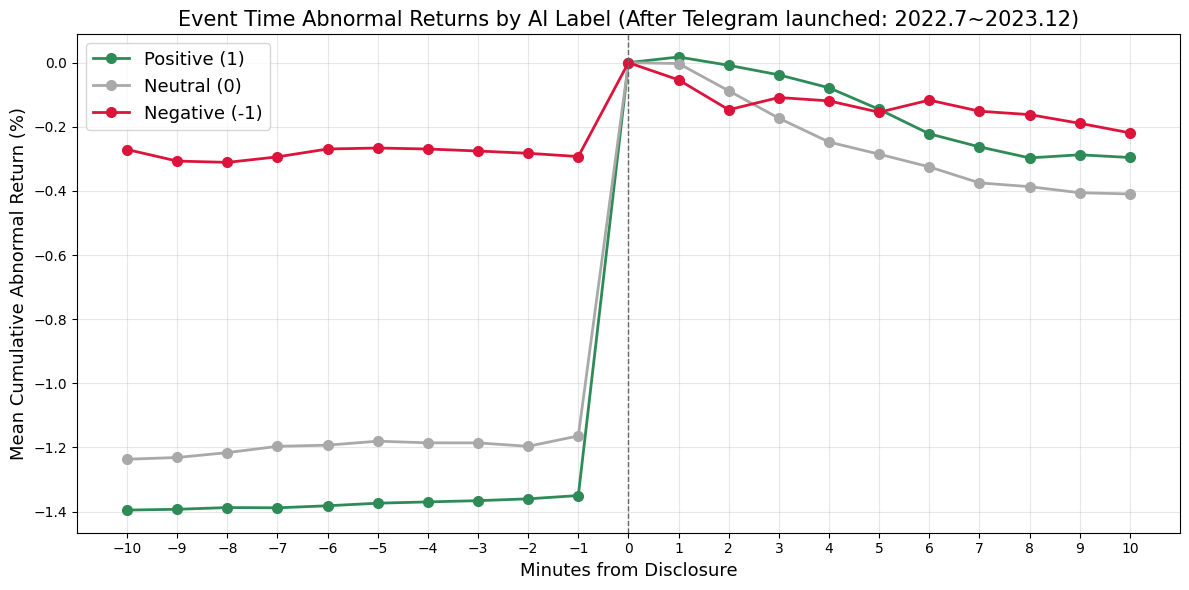

In [19]:
# X축 -10, -9, ..., 0, ..., 10, Y축 abnormal_ret_*m 평균값, 라벨별 색상/범례
# 1분 간격으로, 각 데이터 포인트에 점도 표시 (marker 추가)
# t=0에서는 항상 (0, 0) 점을 찍어줌

# 시간순으로 정렬 (마이너스 시간이 먼저 오도록)
time_order = {
    'abn_ret_minus_10m': -10, 'abn_ret_minus_9m': -9, 'abn_ret_minus_8m': -8, 'abn_ret_minus_7m': -7,
    'abn_ret_minus_6m': -6, 'abn_ret_minus_5m': -5, 'abn_ret_minus_4m': -4, 'abn_ret_minus_3m': -3,
    'abn_ret_minus_2m': -2, 'abn_ret_minus_1m': -1,
    # 0분 컬럼은 없음 (중간에 직접 삽입)
    'abn_ret_1m': 1, 'abn_ret_2m': 2, 'abn_ret_3m': 3, 'abn_ret_4m': 4,
    'abn_ret_5m': 5, 'abn_ret_6m': 6, 'abn_ret_7m': 7, 'abn_ret_8m': 8, 'abn_ret_9m': 9, 'abn_ret_10m': 10
}

ordered_ret_cols = [col for col, _ in sorted(time_order.items(), key=lambda x: x[1]) if col in df_with_returns.columns]
plot_time_points = [time_order[col] for col in ordered_ret_cols]

# t=0 시점 추가 (컬럼에는 없으니 직접 넣는다)
insert_zero_idx = 0
for idx, t in enumerate(plot_time_points):
    if t > 0:
        insert_zero_idx = idx
        break
    else:
        insert_zero_idx = idx+1
plot_time_points_with_zero = plot_time_points[:insert_zero_idx] + [0] + plot_time_points[insert_zero_idx:]
ordered_ret_cols_with_zero = ordered_ret_cols[:insert_zero_idx] + ['__ZERO__'] + ordered_ret_cols[insert_zero_idx:]

fig, ax = plt.subplots(figsize=(12,6))

for label, color, name in zip(label_order, colors, label_names):  # <-- fixed! use normal zip
    grp = df_with_returns[df_with_returns['label'] == label]
    mean_vals = grp[ordered_ret_cols].mean()
    # 0분 컬럼값을 0으로(중간에 삽입)
    mean_vals_with_zero = list(mean_vals.values[:insert_zero_idx]) + [0.0] + list(mean_vals.values[insert_zero_idx:])
    # 선 그래프 + 데이터 포인트에 점(marker='o') 표시
    ax.plot(
        plot_time_points_with_zero,
        mean_vals_with_zero,
        label=name,
        color=color,
        linewidth=2,
        marker='o',
        markersize=7
    )
    # t=0인 점 강조(원해도 되고, 안 해도 됨)

ax.axvline(0, color="#666", linestyle="--", lw=1)
ax.legend(fontsize=13)
ax.set_xticks(plot_time_points_with_zero)
ax.set_xlabel("Minutes from Disclosure", fontsize=13)
ax.set_ylabel("Mean Cumulative Abnormal Return (%)", fontsize=13)
ax.set_title("Event Time Abnormal Returns by AI Label (After Telegram launched: 2022.7~2023.12)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


# 공시 종류별 감성 분포

In [20]:
df_with_returns.groupby('disclosure_type')[ret_columns].mean().round(2)


,abn_ret_minus_10m,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,abn_ret_minus_1m,abn_ret_1m,abn_ret_2m,abn_ret_3m,abn_ret_4m,abn_ret_5m,abn_ret_6m,abn_ret_7m,abn_ret_8m,abn_ret_9m,abn_ret_10m
disclosure_type,,,,,,,,,,,,,,,,,,,,
감자 결정,-1.01,-1.02,-1.02,-0.97,-0.92,-0.89,-0.89,-0.90,-0.67,-0.21,0.08,-0.67,-0.75,-0.64,-1.20,-1.38,-1.55,-1.62,-1.62,-1.58
교환사채권 발행결정,-0.24,-0.32,-0.34,-0.41,-0.18,-0.11,-0.21,-0.11,-0.29,-0.48,-0.16,-0.36,-0.22,-0.03,-0.35,-0.42,-0.37,-0.28,-0.65,-0.67
기술이전계약체결,-9.04,-8.58,-8.78,-7.61,-7.62,-7.30,-7.20,-6.28,-6.33,-5.98,-0.01,-0.06,0.39,0.30,2.18,1.14,0.94,2.59,3.64,4.82
단일판매ㆍ공급계약체결,-1.65,-1.64,-1.63,-1.63,-1.63,-1.61,-1.61,-1.61,-1.61,-1.59,0.05,-0.00,-0.12,-0.19,-0.29,-0.37,-0.42,-0.48,-0.50,-0.52
단일판매ㆍ공급계약해지,-0.33,-0.26,-0.28,-0.29,-0.33,-0.35,-0.37,-0.35,-0.33,-0.31,0.06,-0.14,0.06,-0.31,-0.25,-0.30,-0.41,-0.37,-0.60,-0.59
매출액변동,-0.68,-0.68,-0.66,-0.66,-0.65,-0.67,-0.65,-0.65,-0.65,-0.66,-0.04,-0.15,-0.13,-0.17,-0.18,-0.19,-0.22,-0.20,-0.19,-0.18
무상증자 결정,-0.33,-0.35,-0.42,-0.41,-0.39,-0.39,-0.37,-0.38,-0.43,-0.40,-0.06,0.05,-0.14,-0.18,-0.15,-0.21,-0.25,-0.22,-0.30,-0.33
상각형 조건부자본증권 발행결정,-0.04,0.06,0.14,0.18,0.01,-0.01,-0.04,0.04,0.02,0.01,-0.09,-0.06,-0.09,-0.12,-0.16,-0.16,-0.17,-0.24,-0.17,-0.16
생산중단,0.12,0.11,0.13,0.15,0.14,0.17,0.22,0.19,0.16,0.12,-0.19,-0.18,-0.27,-0.30,-0.25,-0.26,-0.23,-0.30,-0.30,-0.33


In [21]:
df_with_returns.groupby('disclosure_type')[ret_columns].std()


,abn_ret_minus_10m,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,abn_ret_minus_1m,abn_ret_1m,abn_ret_2m,abn_ret_3m,abn_ret_4m,abn_ret_5m,abn_ret_6m,abn_ret_7m,abn_ret_8m,abn_ret_9m,abn_ret_10m
disclosure_type,,,,,,,,,,,,,,,,,,,,
감자 결정,1.065162,1.020358,1.016105,1.045194,1.043326,1.115244,1.114392,1.111067,1.167099,0.398472,0.382531,0.766290,1.145622,1.185483,1.851180,2.282754,2.456480,2.597499,2.608333,2.537799
교환사채권 발행결정,1.196741,1.227036,1.082326,1.017834,1.161775,1.269472,1.054135,0.999840,0.960821,1.254395,0.629434,1.064075,0.747081,0.785283,0.936499,1.237235,1.244074,1.209723,1.721037,1.553296
기술이전계약체결,3.557776,3.000026,3.275983,2.708227,2.634097,2.916178,3.267398,4.417816,4.394848,4.905035,0.020000,2.373975,5.164707,5.779027,8.022653,7.085061,7.322320,8.755541,11.868390,12.188124
단일판매ㆍ공급계약체결,2.155401,2.159222,2.156131,2.153051,2.150858,2.136239,2.137774,2.129330,2.118395,2.116546,1.606063,1.967957,2.148452,2.299132,2.389723,2.476540,2.525130,2.505007,2.500609,2.515079
단일판매ㆍ공급계약해지,0.541283,0.491285,0.441851,0.477848,0.427348,0.471824,0.479362,0.553904,0.473657,0.419651,0.465923,0.398275,0.775397,0.914295,0.652728,1.032120,1.005925,1.038241,1.268789,1.034309
매출액변동,1.257954,1.258968,1.247026,1.250118,1.252378,1.216679,1.222419,1.209524,1.201070,1.190816,1.032116,1.068872,1.394577,1.382595,1.356109,1.548365,1.538376,1.504464,1.729903,1.764301
무상증자 결정,1.413859,1.366682,1.301168,1.389923,1.340555,1.295423,1.272423,1.315487,1.316104,1.319544,0.293909,0.636944,0.933837,0.924030,0.960879,0.990609,1.063772,0.824578,0.880224,1.003280
상각형 조건부자본증권 발행결정,0.251254,0.255650,0.200071,0.191821,0.204997,0.241917,0.190163,0.194410,0.193021,0.114414,0.186318,0.159164,0.253631,0.201483,0.175770,0.171548,0.228597,0.308053,0.271956,0.251031
생산중단,0.520210,0.532060,0.476483,0.461055,0.484045,0.590404,0.470169,0.442393,0.452755,0.389624,0.391469,0.387801,0.458559,0.480998,0.409305,0.569243,0.570561,0.649106,0.596702,0.627745


In [22]:
# 공시 종류별 sentiment 분포 분석 (disclosure_type 기준)
disclosure_sentiment = df_with_returns.groupby(['disclosure_type', 'label']).size().unstack(fill_value=0)

# label 컬럼 정렬: negative(-1), neutral(0), positive(1) 순서
label_sort_order = [-1, 0, 1]
filtered_columns = [col for col in label_sort_order if col in disclosure_sentiment.columns]
disclosure_sentiment = disclosure_sentiment[filtered_columns]

# 비율로 변환
disclosure_sentiment_pct = disclosure_sentiment.div(disclosure_sentiment.sum(axis=1), axis=0) * 100

# 수치 요약 전체 DataFrame으로 만들어서 출력 (전체 공시 종류)
summary_df = disclosure_sentiment.copy()
for col in disclosure_sentiment_pct.columns:
    summary_df[f"{col}_pct"] = disclosure_sentiment_pct[col].round(1)

# 샘플 개수(행별 합) 기준 내림차순 정렬
summary_df['total_count'] = summary_df[[col for col in [-1, 0, 1] if col in summary_df.columns]].sum(axis=1)
summary_df = summary_df.sort_values('total_count', ascending=False)
summary_df = summary_df.drop(columns=['total_count'])

print("=== 전체 공시 종류별 감정 분포 ===")
summary_df

=== 전체 공시 종류별 감정 분포 ===


label,-1,0,1,-1_pct,0_pct,1_pct
disclosure_type,,,,,,
단일판매ㆍ공급계약체결,1,484,980,0.1,33.0,66.9
매출액변동,137,88,384,22.5,14.4,63.1
자기주식취득 신탁계약 체결 결정,2,60,154,0.9,27.8,71.3
타법인 주식 및 출자증권 양수결정,3,57,139,1.5,28.6,69.8
자기주식 취득 결정,0,9,121,0.0,6.9,93.1
특허권취득,0,2,114,0.0,1.7,98.3
자기주식 처분 결정,32,64,2,32.7,65.3,2.0
신규시설투자,0,28,59,0.0,32.2,67.8
자기주식 소각 결정,3,7,62,4.2,9.7,86.1


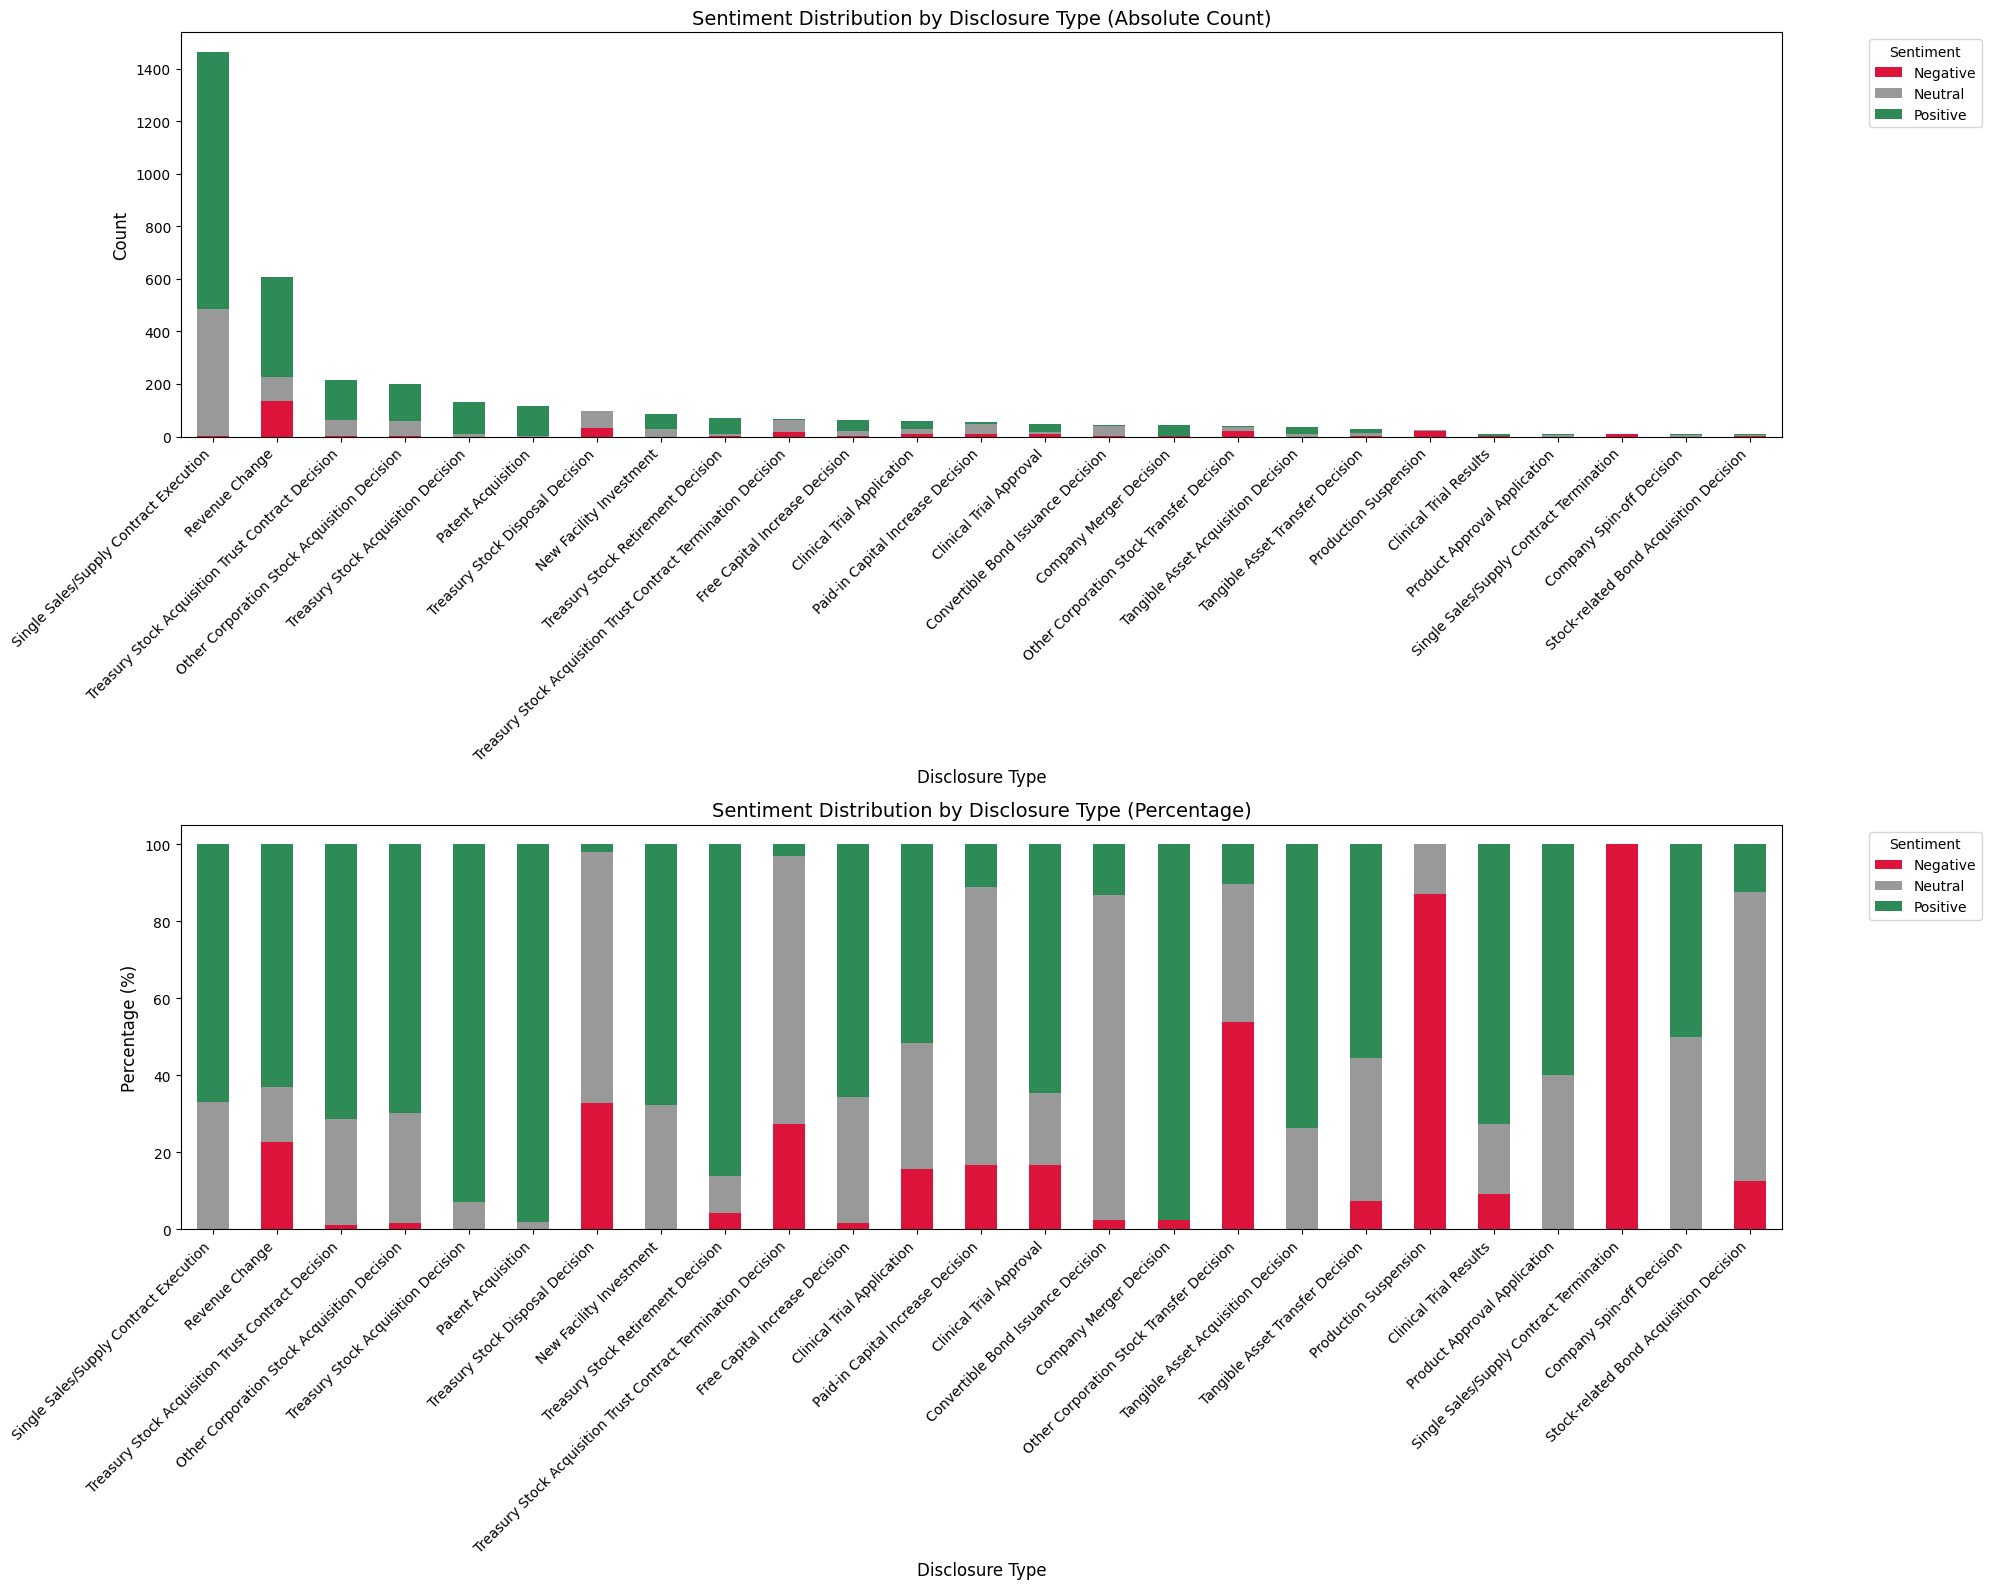

In [23]:
# 상위 20개 공시 종류만 선택 (데이터가 많은 순서대로)
top_disclosures = df_with_returns['disclosure_type'].value_counts().head(25).index
disclosure_sentiment_top = disclosure_sentiment.loc[top_disclosures]
disclosure_sentiment_pct_top = disclosure_sentiment_pct.loc[top_disclosures]

# 색상 매핑: negative(빨강), neutral(회색), positive(초록)
sentiment_colors = {
    -1: "#DC143C", # 빨강 (negative)
     0: "#999999", # 회색 (neutral)
     1: "#2E8B57"  # 초록 (positive)
}
plot_colors = [sentiment_colors[col] for col in filtered_columns]

# 시각화 (세로로 2개 배치)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# 1. 절대 개수
disclosure_sentiment_top.plot(kind='bar', stacked=True, ax=ax1, color=plot_colors)
ax1.set_title('Sentiment Distribution by Disclosure Type (Absolute Count)', fontsize=14)
ax1.set_xlabel('Disclosure Type', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend([ 'Negative', 'Neutral', 'Positive' ], title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

x_labels = [category_mapping.get(cat, cat) for cat in top_disclosures]
ax1.set_xticklabels(x_labels, rotation=45, ha='right')

# 2. 비율(%)
disclosure_sentiment_pct_top.plot(kind='bar', stacked=True, ax=ax2, color=plot_colors)
ax2.set_title('Sentiment Distribution by Disclosure Type (Percentage)', fontsize=14)
ax2.set_xlabel('Disclosure Type', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend([ 'Negative', 'Neutral', 'Positive' ], title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_xticklabels(x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()
